# Research assignment 3

Camellia Haghverdian

International Graduate Student Recruitment in American Universities

02/27/2024

## 1. Build your hypothesis

Write bullet points that answer the following questions:

    A. What is your depedent variable? For this assignment, your depedent should be a continuous variable. Describe how your depedent variable is measured. If your data doesn't allow this, you can use either the General Social Survey 2018 or the Grant and Loan Repayment data. 
    
    H1: My dependent variable is the number of international graduate students recruited by American universities.
    
    H2: The dependent variable is the number of international graduate students.
    
    B. What are the indepedent variables you are most interested in? Are they interval ratio or nominal? Why?
    
    H1: My independent variable is the ratio of total number white students to the total number of students in each school. This is an interval ratio variable because each value is measured so that it is placed at an equal distance from one another in a clear order.
    
    H2: My independent variables are full time or part time positions. These are nominal variables because they are categories.

    C. What are your control variables? Are they interval ratio or nominal? Why?
    
    H1: The control variables I have in my mind are not present in this dataset; however, I think it's important that they are considered. The variables are the following: gender (which is present in this dataset but due to a lot of missing values, I decided to exclude it from my measurements), socioeconomic status (SES), and country of origin. I assume these variables have influence on international students' decisions when applying for graduate schools in American universities.
    
    H2: The control variables for this hypothesis are very similar to the previous hypothesis. However, I assume SES would be more important for this hypothesis.

    D. What are your hyphotheses on the relationships between your dependent and independent variables (including control variables)? Make seperate hypotheses for separate independent variables and for intervening relationships that involve multiple independent variables of interest.
    
    H1: My hypothesis would be that interantional students, specifically those who are coming from high SES backgrounds and (perhaps) European countries, are more likely to be admitted to predominantly white schools.
    
    H2: The majority of international graduate students are looking for full-time positions in schools rather than part-time positions. 

## 2. Prepare your data

Do the following:

    A. Set current directory

    B. Set more off

    C. Creat log file
    
    D. Load only variable from the dataset that you will use

    E. Use -describe- and -codebook- to see details of the varaibles

In [1]:
copy "https://nces.ed.gov/ipeds/datacenter/data/EF2022A_Data_Stata.zip" EF2022A_Data_Stata.zip, replace

In [2]:
copy https://nces.ed.gov/ipeds/datacenter/data/HD2022_Data_Stata.zip HD2022_Data_Stata.zip, replace

In [3]:
unzipfile HD2022_Data_Stata.zip

    can't overwrite "hd2022_data_stata.csv"; skipping

successfully unzipped HD2022_Data_Stata.zip to current directory
total processed:  1
        skipped:  1
      extracted:  0


In [4]:
unzipfile EF2022A_Data_Stata.zip

    can't overwrite "ef2022a_data_stata.csv"; skipping

successfully unzipped EF2022A_Data_Stata.zip to current directory
total processed:  1
        skipped:  1
      extracted:  0


In [5]:
insheet using ef2022a_data_stata.csv, clear

(73 vars, 116,110 obs)


In [6]:
keep efalevel unitid eftotlt efnralt efwhitt

In [7]:
gen id = _n

In [8]:
log using "Research Assignment 3.log", replace

-------------------------------------------------------------------------------
      name:  <unnamed>
       log:  /Users/camellia/Documents/Stats 2/soc211_assignments/Week 7/Resear
> ch Assignment 3.log
  log type:  text
 opened on:  29 Feb 2024, 10:31:35


In [9]:
describe


Contains data
 Observations:       116,110                  
    Variables:             6                  
-------------------------------------------------------------------------------
Variable      Storage   Display    Value
    name         type    format    label      Variable label
-------------------------------------------------------------------------------
unitid          long    %12.0g                UNITID
efalevel        byte    %8.0g                 EFALEVEL
eftotlt         long    %12.0g                EFTOTLT
efwhitt         long    %12.0g                EFWHITT
efnralt         int     %8.0g                 EFNRALT
id              float   %9.0g                 
-------------------------------------------------------------------------------
Sorted by: 
     Note: Dataset has changed since last saved.


In [10]:
codebook


-------------------------------------------------------------------------------
unitid                                                                   UNITID
-------------------------------------------------------------------------------

                  Type: Numeric (long)

                 Range: [100654,498571]               Units: 1
         Unique values: 5,978                     Missing .: 0/116,110

                  Mean: 263742
             Std. dev.: 132273

           Percentiles:    10%       25%       50%       75%       90%
                        129756    163268    210331    420538    481401

-------------------------------------------------------------------------------
efalevel                                                               EFALEVEL
-------------------------------------------------------------------------------

                  Type: Numeric (byte)

                 Range: [1,60]                        Units: 1
         Unique values: 27       

In [11]:
keep if efalevel == 12 | efalevel == 32 | efalevel == 52

(110,168 observations deleted)


In [12]:
*save fall_enrollment_international2022, replace
*insheet using hd2022_data_stata.csv, clear
*keep unitid control instnm
*merge 1:1 unitid using fall_enrollment_international2022,

In [13]:
*keep if _merge==3

In [14]:
codebook


-------------------------------------------------------------------------------
unitid                                                                   UNITID
-------------------------------------------------------------------------------

                  Type: Numeric (long)

                 Range: [100654,498571]               Units: 1
         Unique values: 2,049                     Missing .: 0/5,942

                  Mean: 223602
             Std. dev.: 107583

           Percentiles:    10%       25%       50%       75%       90%
                        127060    155520    195456    230737    447050

-------------------------------------------------------------------------------
efalevel                                                               EFALEVEL
-------------------------------------------------------------------------------

                  Type: Numeric (byte)

                 Range: [12,52]                       Units: 1
         Unique values: 3          

In [15]:
%head if efnralt>12000

,unitid,efalevel,eftotlt,efwhitt,efnralt,id
2732,190150,12,25880,6183,12377,43992
2899,193900,12,29743,8256,12161,46273


In [16]:
sum eftotlt efn*


    Variable |        Obs        Mean    Std. dev.       Min        Max
-------------+---------------------------------------------------------
     eftotlt |      5,942    1090.781     2644.12          1      47803
     efnralt |      5,942    173.6819    695.9778          0      12377


In [17]:
gen pctint=efnralt / eftotlt * 100

gen pctwhite = efwhitt / eftotlt * 100

*This also includes white intl ss.
*The unit of analysis is institutions.

In [18]:
%head

,unitid,efalevel,eftotlt,efwhitt,efnralt,id,pctint,pctwhite
1,100654,12,801,16,50,7,6.242197,1.997503
2,100654,32,468,7,34,16,7.264957,1.495726
3,100654,52,333,9,16,25,4.804805,2.702703
4,100663,12,8607,4394,1148,34,13.33798,51.05147
5,100663,32,4817,2304,1002,43,20.80133,47.8306


In [19]:
gen fulltime = .
replace fulltime = 1 if efalevel == 32
replace fulltime = 0 if efalevel == 52

(5,942 missing values generated)
(2,000 real changes made)
(1,893 real changes made)


In [20]:
%head

,unitid,efalevel,eftotlt,efwhitt,efnralt,id,pctint,pctwhite,fulltime
1,100654,12,801,16,50,7,6.242197,1.997503,.
2,100654,32,468,7,34,16,7.264957,1.495726,1
3,100654,52,333,9,16,25,4.804805,2.702703,0
4,100663,12,8607,4394,1148,34,13.33798,51.05147,.
5,100663,32,4817,2304,1002,43,20.80133,47.8306,1


## 3. Use scatterplots to visually assess relationships between your dependent variable and all of your independent variables

    A. Quietly generate scatterplots for the dependent variable and each independent variable (including contol variables). Then use graph combine to examine all of the scatter plots.

    B. Write a paragraph interpreting what the scatterplots show

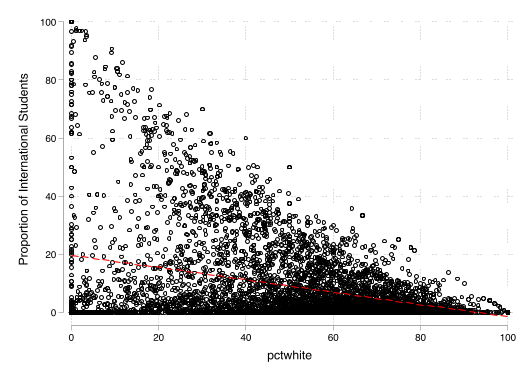

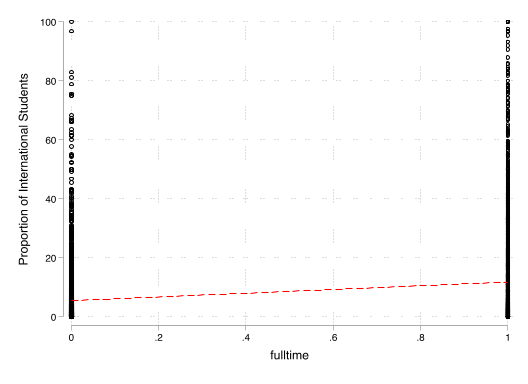

In [21]:
foreach x in pctwhite fulltime {
quietly  graph twoway (scatter pctint `x') (lfit pctint `x', color(red)), ///
    name(`x', replace) legend(off) ytitle("Proportion of International Students") scheme(plotplainblind)
}

In [22]:
%set graph_width = 11

graph size was (5.5in, 4in), is now (11, 4in).


In [23]:
%set graph_height = 8

graph size was (11, 4in), is now (11, 8).


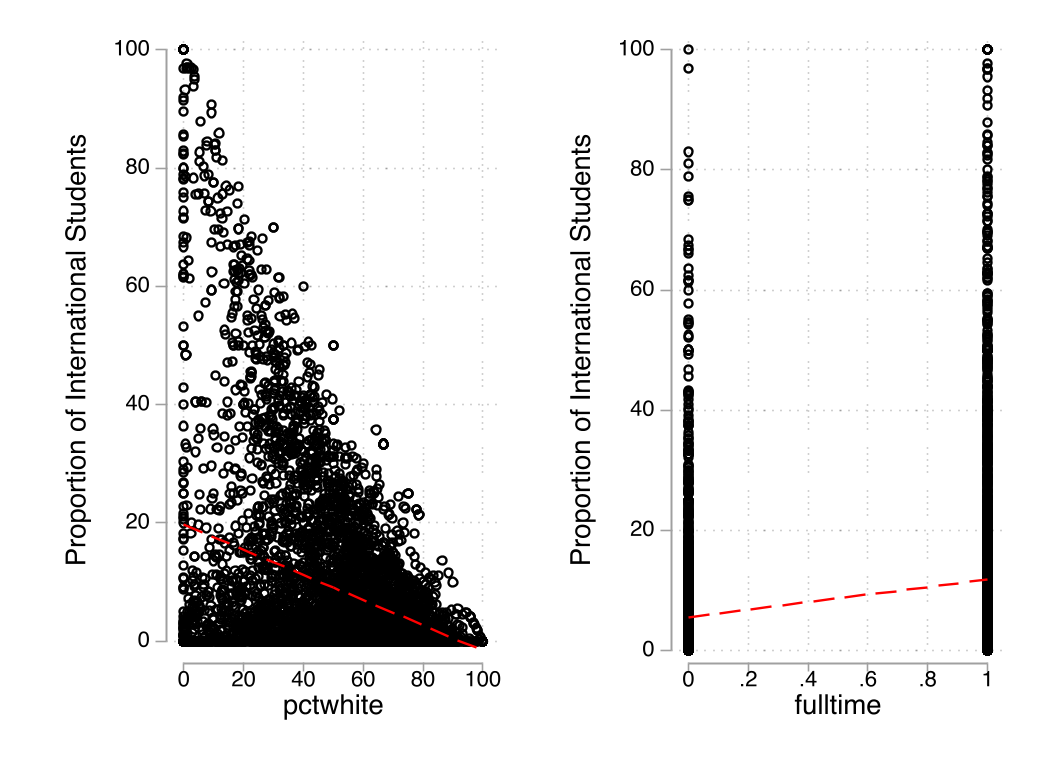

In [24]:
graph combine pctwhite fulltime, col(3) scheme(plotplainblind) xsize(4)

Model 1: On average, every unit of increase in the proportions of white students in American universities is associated with a decrease in the proportions of international students within those universities.

Model 2: On average, the proportion of international students with full time positions are more than the proportion of international students with part time positions.

## 4. Assess multicorrelation among your independent variables

    A. Create a correlation matrix for all of your variables.

    B. . Write bullet points or a short paragraph summarizing what the matrix shows.

In [25]:
pwcorr pctint fulltime pctwhite


             |   pctint fulltime pctwhite
-------------+---------------------------
      pctint |   1.0000 
    fulltime |   0.2044   1.0000 
    pctwhite |  -0.3487  -0.0610   1.0000 


*GENERAL RULE OF THUMB: Anything above 0.5 is a strong correlation. Anything between 0.2-0.5 is a moderate correlation. Anything under a 0.2 is a weak/negligible correlation.
Model 1: This is a moderate negative relationship between pctwhite and pctint. These relationships correspond with what I see in the scatterplot.
Model 2: This is a moderate positive relationship between pctint and fulltime. These relationships correspond with what I see in the scatterplot.
There is no relationship or correlation between pctwhite and fulltime.

## 5. Describe at least 2 OLS models to test your hypotheses

Write a paragraph or a set of bullet points that explain:

    A. Which model tests which of your hypotheses
    
    Model 1 tests hypothesis 1, and model 2 tests hypothesis 2.
    
    B. Which variables are included in each model
    
    Model 1 (pctwhite and proportion of international students)
    Moodel 2 (fulltime and proportion of international students)
    
    C. How/why adding particular variables to subsequent models will test for spurious or intervening relationships?
    
    In my 2nd model, I decided to use the full time/part time controling variable because I believe international graduate students usually prefer full time positions due to all the benefits such as funding and opportunities in general that those positions bring with themselves. Moving out of their home countries and going through the immigration process give them enough pressure to deal with and so they prefer to have at least full time positions.

## 6. Write OLS regression equations for each model

Use subscripts to indicate which symbols represesent your different independent variables. To do so, you can copy and paste the LaTex code in this week's lesson notebook and edit the subscripts.

Model 1:

Here is the extension of the regression equation to multpiple regression:

$\hat{Y} = \alpha + \beta_w \cdot x_w$

$x_w$ is the proprotion of white students.

Model 2: 

Here is the extension of the regression equation to multpiple regression:

$\hat{Y} = \alpha + \beta_w \cdot x_w + \beta_f \cdot x_f$

$x_w$ is the proportion of white students

$x_f$ is x_f is the institutions with full time positions.

## 7. Estimate your models with stata

    A. Write Stata code to estimate the models and store the regression results
    
    B. Write code to output the estimates in a table within Jupyter Notebook in HTML (with %html magic) and as an RTF file

In [26]:
est clear

*Model 1
quietly eststo: reg pctint pctwhite

*Model 2
quietly eststo: reg pctint pctwhite fulltime


In [27]:
esttab, stats(r2 N, labels("R-Squared" "N")) cells(b(star fmt(3)) se(fmt(3) par)) /// 
  nobase mlabels ("Model 1" "Model 2") starlevels(* .05 ** .01 *** .001) ///
  coeflabels (pctwhite "White Students" fulltime "Full-time") noconstant


--------------------------------------------
                      (1)             (2)   
                  Model 1         Model 2   
                     b/se            b/se   
--------------------------------------------
White Stud~s       -0.213***       -0.198***
                  (0.007)         (0.009)   
Full-time                           5.717***
                                  (0.459)   
--------------------------------------------
R-Squared           0.122           0.149   
N                5942.000        3893.000   
--------------------------------------------


In [28]:
reg pctint pctwhite


      Source |       SS           df       MS      Number of obs   =     5,942
-------------+----------------------------------   F(1, 5940)      =    822.13
       Model |  173604.238         1  173604.238   Prob > F        =    0.0000
    Residual |  1254313.64     5,940  211.163913   R-squared       =    0.1216
-------------+----------------------------------   Adj R-squared   =    0.1214
       Total |  1427917.88     5,941  240.349753   Root MSE        =    14.531

------------------------------------------------------------------------------
      pctint | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
    pctwhite |  -.2126753   .0074173   -28.67   0.000    -.2272159   -.1981346
       _cons |   19.69972   .4206009    46.84   0.000     18.87519    20.52425
------------------------------------------------------------------------------


In [29]:
reg pctint pctwhite fulltime


      Source |       SS           df       MS      Number of obs   =     3,893
-------------+----------------------------------   F(2, 3890)      =    340.76
       Model |  139385.028         2  69692.5142   Prob > F        =    0.0000
    Residual |  795592.769     3,890  204.522563   R-squared       =    0.1491
-------------+----------------------------------   Adj R-squared   =    0.1486
       Total |  934977.798     3,892  240.230678   Root MSE        =    14.301

------------------------------------------------------------------------------
      pctint | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
    pctwhite |  -.1978484   .0089332   -22.15   0.000    -.2153626   -.1803342
    fulltime |   5.717477   .4594425    12.44   0.000     4.816706    6.618248
       _cons |    15.8287   .5708758    27.73   0.000     14.70946    16.94795
--------------------------------------------------

In [30]:
quietly esttab using researchassignment3_tables.rtf, stats(r2 N, labels("R-Squared" "N")) cells(b(star fmt(3)) se(fmt(3) par)) /// 
  nobase mlabels ("Model 1" "Model 2") starlevels(* .05 ** .01 *** .001) ///
  coeflabels (pctwhite "White Students" fulltime "Full-time") noconstant rtf replace


## 8. Summarize the results for your hypotheses

    A. Which of your hypotheses are supported and which are rejected by the (in)consistency of coefficients across all of your models?
    
    My hypothesis for the first model is rejected. The P value for pctint and pctwhite is 0.000, which is very significant. The proportion of international graduate students is not associated with the mbeing admitted to predominantly white universities.
    
    My hypothesis for the second model is accepted. The P value for pctint and fulltime is 0.000, which is very significant. There is a high association between international graduate students and them being admitted to full time positions in American universities.
    
    B. Which of your hypotheses regarding intervening or spurious relationships are supported / rejected by similarities / differences in coefficients across all of your models?
    
    Despite the fact that my 1st hypothesis wasn't supported, I made a 2nd model using the fulltime controling variable. Even after adding the control variable into the model, the relationship between proportion of intl students and proportion of white students remains statistically significant. This shows that the control variable is not affecting the realtionship between the two variables I'm most interested in.

    C. What ideas do you have for why any of your hypotheses were rejected? Are there additional omitted variables do you think you should include to test your hypotheses that might change your results? Why?
    
    If the control variables such as SES, country of origin, gender, etc. were present in the dataset, I would have been able to make more specific observations regarding international students.